In [70]:
import  itertools  #loops through output of CNN
import matplotlib.pyplot as plt
import cv2  #open cv to open images with python
import numpy as np  #expand dims

import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential

In [2]:
#load up the model
model = load_model('./models/imageclassifier.h5')

In [4]:
#view model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [78]:
#slicing and grabbing first three trained layers
    #viz only will show the output of last layer so chnage this number to visualize different layers
intermediate_layers = model.layers[:5]

In [79]:
#the intermediate model with trained existing layers
intermediate_model = Sequential(intermediate_layers)

In [80]:
intermediate_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
Total params: 9,712
Trainable params: 9,712
Non-traina

In [81]:
#input image should be 256 , 256
intermediate_model.input_shape

(None, 256, 256, 3)

In [82]:
#load the image
image = cv2.imread('happytest2.jpg')
resize = cv2.resize(image, (256,256))

In [83]:
resize.shape

(256, 256, 3)

In [84]:
#wrapping it inside aother set of arrays
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [85]:
#make a prediction
#predict function expects to take batch of data not one file 
    #so use np.expand_dims
yhat = intermediate_model.predict(np.expand_dims(resize, 0))

1/1 [==============================] - 0s 95ms/step


In [86]:
yhat.shape

(1, 60, 60, 16)

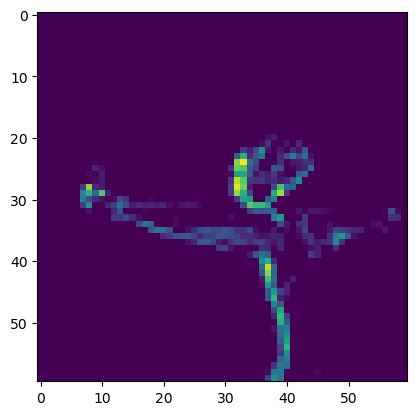

In [87]:
#change the last number to see what individual filter has chosen
plt.imshow(yhat[0,:,:,4])

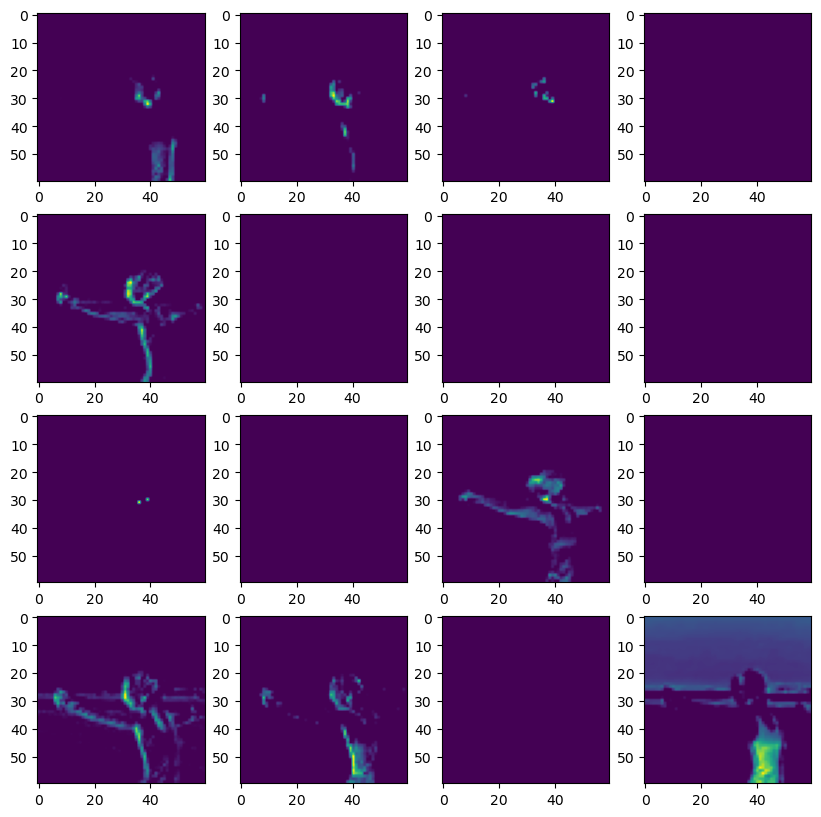

In [88]:
# viz grid
num_rows = 4
num_cols = 4

fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(10,10))
for idx, ax_idx in enumerate(list(itertools.product(range(num_rows), range(num_cols)))):
    ax[ax_idx[0], ax_idx[1]].imshow(yhat[0,:,:,idx])
 